In [35]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [36]:
# load datasets for two subjects, Math and Portuguese
df = pd.read_csv("student-mat.csv", sep=';')

In [37]:
df['final_grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'final_grade'] = 'good' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'final_grade'] = 'fair' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [38]:
# look for missing values
df.isnull().any()

school         False
sex            False
age            False
address        False
famsize        False
Pstatus        False
Medu           False
Fedu           False
Mjob           False
Fjob           False
reason         False
guardian       False
traveltime     False
studytime      False
failures       False
schoolsup      False
famsup         False
paid           False
activities     False
nursery        False
higher         False
internet       False
romantic       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
G1             False
G2             False
G3             False
final_grade    False
dtype: bool

In [39]:
df.to_csv("STUDENT_dataset_Final.csv")

In [40]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'G3'], axis=1)
dfd.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,fair


In [41]:
# label encode final_grade
from sklearn import preprocessing
en = preprocessing.LabelEncoder()
dfd.final_grade = en.fit_transform(dfd.final_grade)
dfd.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


In [42]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X.head()
y.head()

0    2
1    2
2    0
3    1
4    0
Name: final_grade, dtype: int32

In [43]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
292,18,2,1,1,2,1,5,4,3,1,...,1,0,0,1,0,1,0,1,0,1
258,18,2,1,1,2,0,5,2,4,1,...,0,1,0,1,0,1,0,1,1,0
115,16,4,4,1,2,0,5,4,4,1,...,0,1,0,1,0,1,0,1,1,0
129,16,4,4,1,1,0,3,5,5,2,...,0,1,0,1,0,1,0,1,1,0
102,15,4,4,1,1,0,5,3,3,1,...,0,1,1,0,0,1,0,1,1,0


In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[52,  0,  9],
       [ 5, 17,  0],
       [10,  0, 26]], dtype=int64)

In [46]:
# see total number of features
len(list(X_train))

58

In [47]:
X_test.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
138,16,1,1,1,2,1,4,4,4,1,...,1,0,0,1,0,1,1,0,0,1
144,17,2,1,1,1,3,5,4,5,1,...,1,0,0,1,0,1,0,1,1,0
308,19,3,3,1,2,1,4,5,3,1,...,0,1,0,1,0,1,1,0,0,1
215,17,3,2,2,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [48]:
##########################################################################################################
#DECISON TREE CLASSIFIER

In [49]:
# find the optimal Number of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()


50    0.882353
51    0.882353
52    0.882353
53    0.882353
54    0.882353
55    0.882353
56    0.882353
dtype: float64

In [50]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.9094202898550725 , Cross Validation Score : 0.8739495798319328


In [51]:
################################################################################
#######RANDOM FOREST#################

In [52]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=10)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()


6    0.848739
dtype: float64

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion= 'entropy',n_estimators=10, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[53,  1,  7],
       [ 9, 13,  0],
       [ 8,  0, 28]], dtype=int64)

In [55]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

8    0.882353
dtype: float64

In [56]:
# final model
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9601449275362319 , Cross Validation Score : 0.8235294117647058


In [57]:
################################################################
#SVC
from sklearn.svm import SVC
classifier = SVC (kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  1,  6],
       [ 9, 13,  0],
       [ 6,  0, 30]], dtype=int64)

In [59]:
from sklearn.svm import SVC
svc = SVC()

s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.9456521739130435 , Cross Validation Score : 0.8151260504201681


C:\Users\nishi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
###########################################################################################################
#LOGISTIC REGRESSION

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [62]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.680672
2     0.806723
3     0.831933
4     0.722689
5     0.731092
6     0.722689
7     0.243697
8     0.243697
9     0.697479
10    0.806723
11    0.823529
12    0.697479
13    0.655462
14    0.680672
15    0.243697
16    0.252101
17    0.260504
18    0.638655
19    0.638655
20    0.638655
21    0.638655
22    0.621849
23    0.613445
24    0.613445
25    0.436975
26    0.613445
27    0.647059
28    0.369748
29    0.378151
30    0.378151
31    0.840336
32    0.823529
33    0.537815
34    0.546218
35    0.571429
36    0.563025
37    0.521008
38    0.546218
39    0.420168
40    0.302521
41    0.302521
42    0.302521
43    0.445378
44    0.655462
45    0.647059
46    0.638655
47    0.638655
48    0.647059
49    0.873950
50    0.865546
51    0.621849
52    0.630252
53    0.655462
54    0.647059
55    0.470588
56    0.470588
57         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

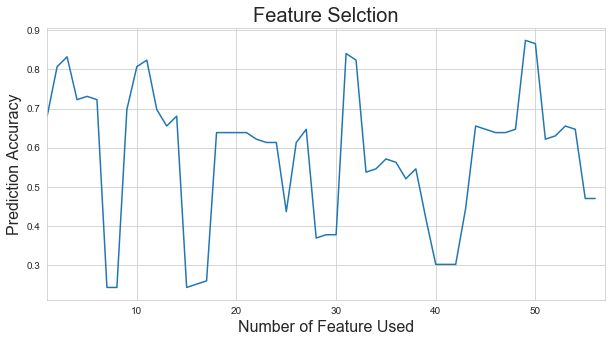

In [63]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [64]:
ks.where(ks==ks.max()).dropna()

49    0.87395
dtype: float64

In [65]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.9021739130434783 , Cross Validation Score : 0.24369747899159663
